In [1]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.linspace(0, 4, 41).view(-1, 1)
    self.y = torch.zeros(self.x.shape[0])
    self.y[0:10] = 0  # Class 0
    self.y[10:20] = 1  # Class 1
    self.y[20:30] = 2  # Class 2
    self.y[30:41] = 3  # Class 3
    self.y = self.y.type(torch.LongTensor)
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len


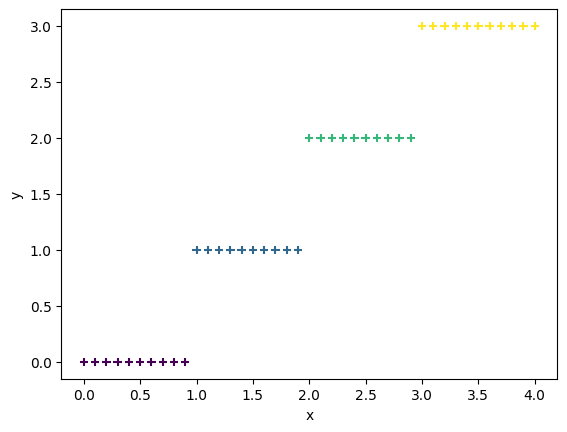

In [3]:
dataset = Data()
plt.scatter(dataset.x.detach().numpy(), dataset.y.detach().numpy(), marker='+', c = dataset.y.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
class Softmax(nn.Module):
  def __init__(self, input_size, output_size):
    super(Softmax, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.linear(x)

In [5]:
trainloader = DataLoader(dataset, batch_size=5)

In [6]:
model = Softmax(1, 4)
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

In [7]:
LOSS=[]
epochs=501
iteration=np.array([i for i in range(epochs)])
def training(epochs):
  for epoch in range(epochs):
    Y_hat = model(dataset.x)
    loss_epoch = criterion(Y_hat, dataset.y)
    LOSS.append(loss_epoch.detach().numpy())
    if epoch % 100 ==0 : print(loss_epoch)
    for x, y in trainloader:
      y_hat = model(x)
      loss = criterion(y_hat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  plt.plot(iteration, LOSS)
  plt.xlabel('iter')
  plt.ylabel('loss')
  plt.plot

tensor(1.7194, grad_fn=<NllLossBackward0>)
tensor(0.6060, grad_fn=<NllLossBackward0>)
tensor(0.4767, grad_fn=<NllLossBackward0>)
tensor(0.4110, grad_fn=<NllLossBackward0>)
tensor(0.3686, grad_fn=<NllLossBackward0>)
tensor(0.3381, grad_fn=<NllLossBackward0>)


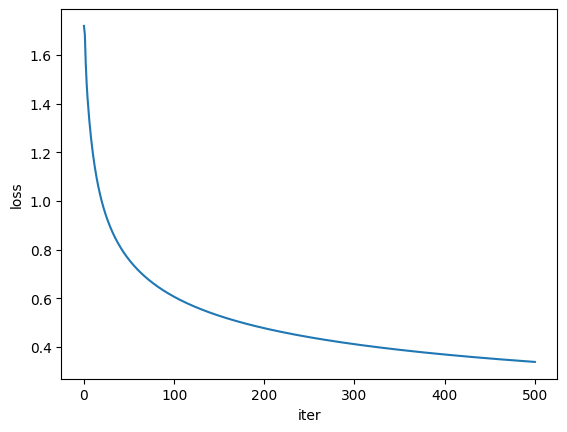

In [8]:
training(epochs)

In [9]:
_, y_hat = model(dataset.x).max(1)
print('accuracy= ', ((y_hat==dataset.y).sum()/len(dataset)).item())

accuracy=  0.9268292784690857
